In [1]:
from churn_library import import_data, perform_eda, perform_feature_engineering, train_models, encoder_helper, classification_report_image, feature_importance_plot
import joblib
import shap

In [2]:
df = import_data("./data/bank_data.csv")
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [3]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


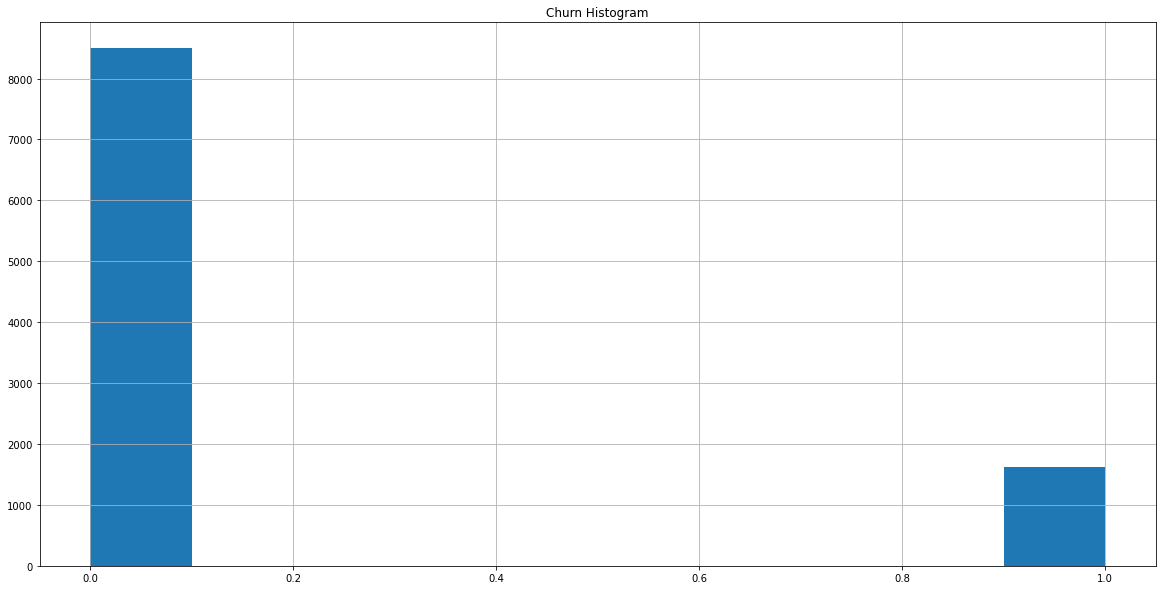

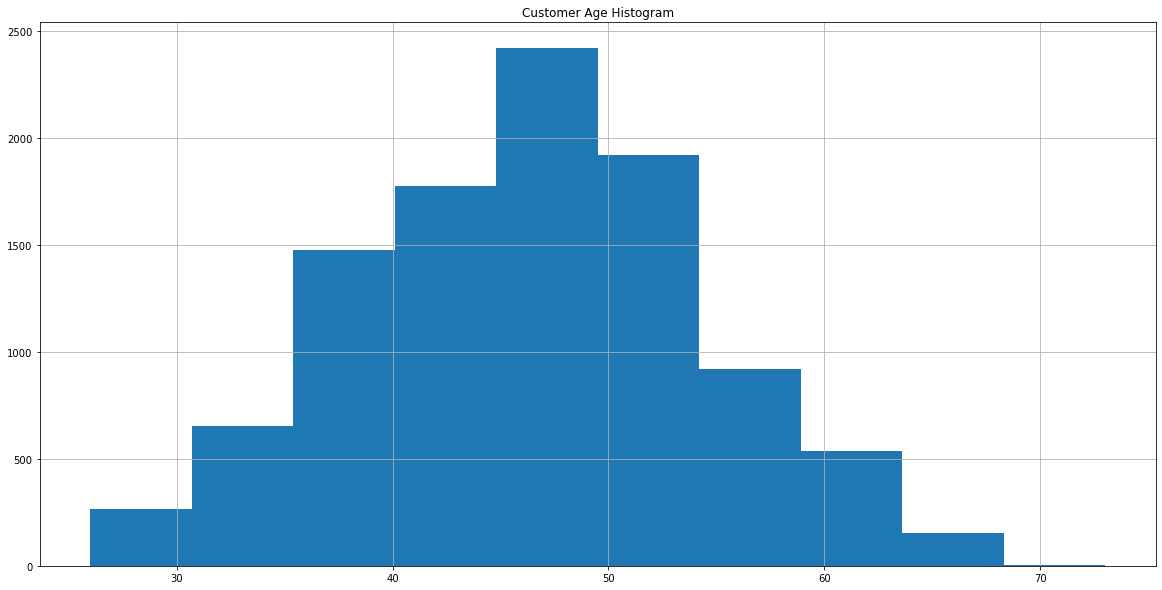

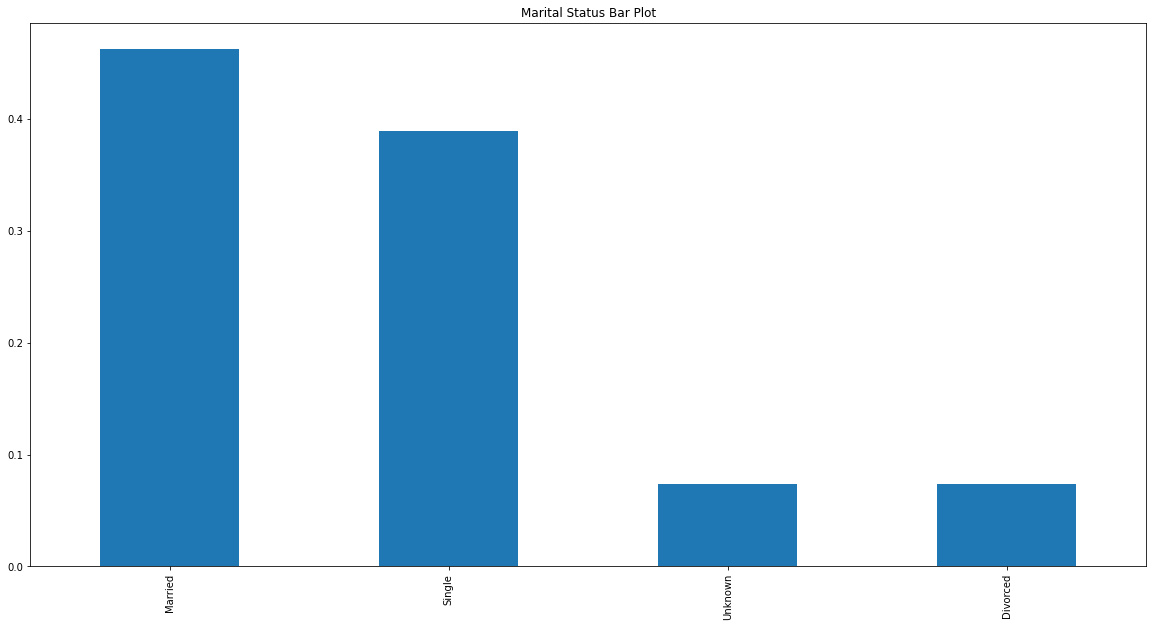

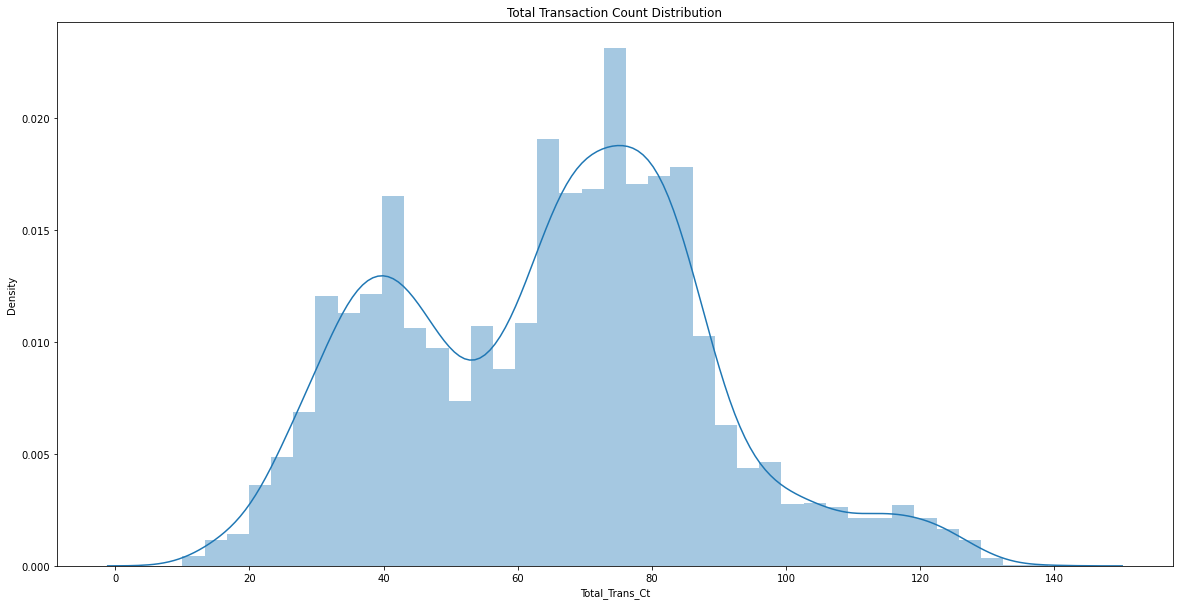

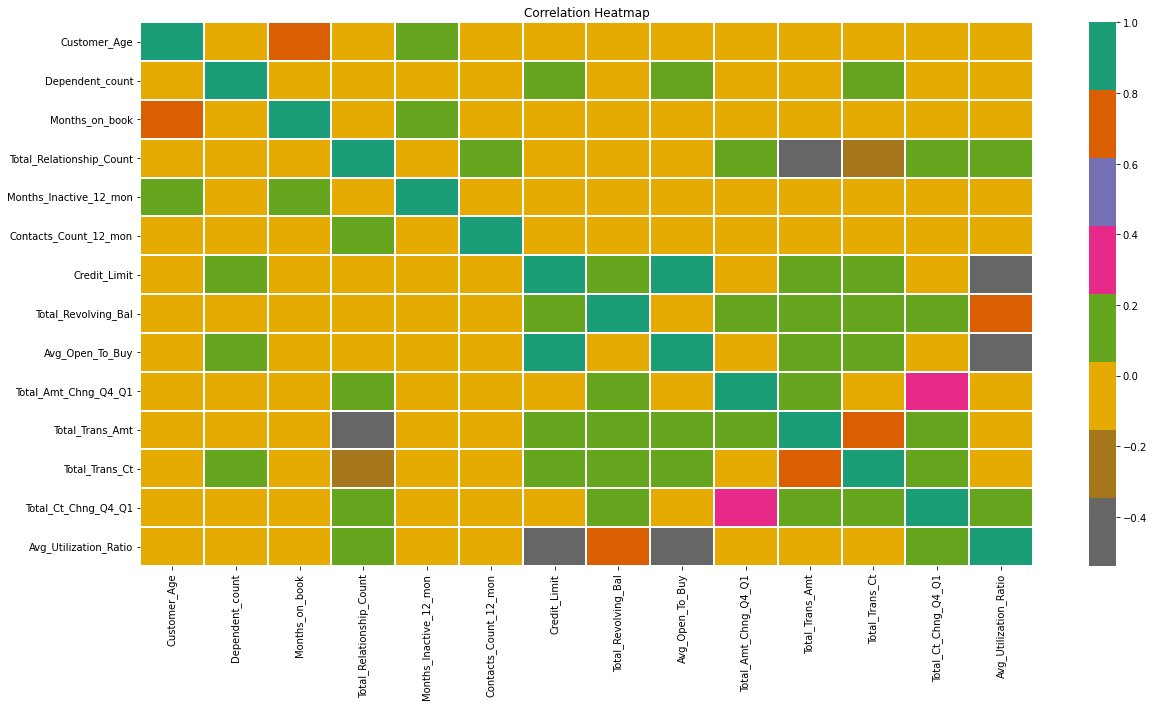

In [4]:
perform_eda(df)

In [5]:
cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'                
]

In [6]:
df.columns

Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn'],
      dtype='object')

In [7]:
encoder_helper(df, cat_columns, 'Churn')

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1144,42,1.625,0.061,0,0.146152,0.152012,0.151269,0.134807,0.160979
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1291,33,3.714,0.105,0,0.173572,0.155691,0.169414,0.171862,0.160979
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1887,20,2.333,0.000,0,0.146152,0.155691,0.151269,0.157655,0.160979
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,1171,20,2.333,0.760,0,0.173572,0.152012,0.172230,0.171862,0.160979
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,816,28,2.500,0.000,0,0.146152,0.159381,0.151269,0.134807,0.160979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,...,15476,117,0.857,0.462,0,0.146152,0.155691,0.169414,0.151397,0.160979
10123,10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,...,8764,69,0.683,0.511,1,0.146152,0.168532,0.161765,0.151397,0.160979
10124,10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,...,10291,60,0.818,0.000,1,0.173572,0.152012,0.151269,0.171862,0.160979
10125,10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,...,8395,62,0.722,0.000,1,0.146152,0.155691,0.172230,0.151397,0.160979


In [8]:
df.columns

Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn', 'Gender_Churn', 'Education_Level_Churn',
       'Marital_Status_Churn', 'Income_Category_Churn', 'Card_Category_Churn'],
      dtype='object')

In [9]:
x_train, x_test, y_train, y_test = perform_feature_engineering(df, 'Churn')

In [10]:
y_train_preds_lr, y_train_preds_rf, y_test_preds_lr, y_test_preds_rf = train_models(x_train, x_test, y_train, y_test)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

Random Forest Results
Test Results
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2543
           1       0.93      0.80      0.86       496

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

Train Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5957
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

Logistic Regression Results
Test Results
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2543
           1       0.72      0.44      0.54       496

    accuracy                           0.88      3039
   macro avg       0.81      0.70     

In [11]:
classification_report_image(y_train, y_test, y_train_preds_lr, y_train_preds_rf, y_test_preds_lr, y_test_preds_rf)

In [12]:
model = joblib.load('models/rfc_model.pkl')

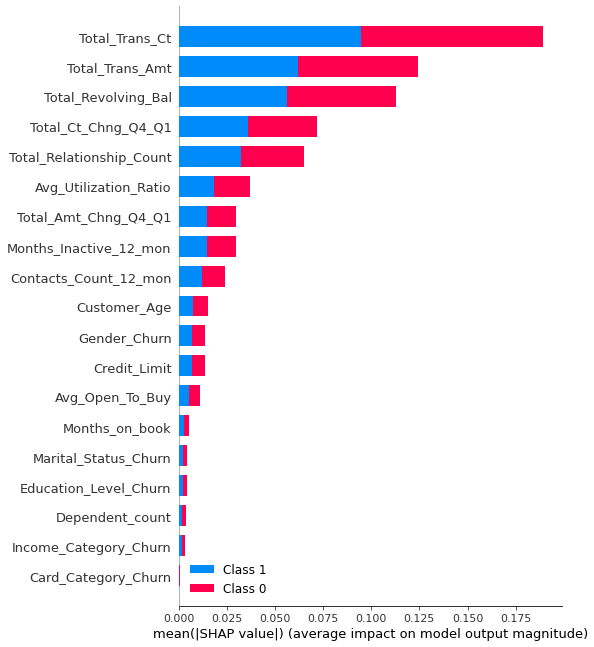

In [15]:
feature_importance_plot(model, x_test, 'images/results/')